In [277]:
import numpy as np
import pandas as pd

Reading dataset

In [278]:
from sklearn.utils import shuffle
df=pd.read_csv("healthcare-dataset-stroke-data.csv")
df=shuffle(df)
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
2898,64974,Male,0.24,0,0,No,children,Urban,58.35,18.6,Unknown,0
1353,20370,Female,50.00,0,0,Yes,Self-employed,Rural,103.81,28.3,never smoked,0
2514,70625,Male,18.00,0,0,No,Private,Urban,79.35,23.6,Unknown,0
3962,55356,Female,80.00,0,0,Yes,Self-employed,Urban,223.26,25.4,never smoked,0
1462,41870,Male,17.00,0,0,No,Never_worked,Rural,61.01,32.5,Unknown,0


#Step 1: Removing unnecessary columns from dataset / Feature Selection Technique.


In [279]:
df.drop('id',axis=1, inplace=True)
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
2898,Male,0.24,0,0,No,children,Urban,58.35,18.6,Unknown,0
1353,Female,50.00,0,0,Yes,Self-employed,Rural,103.81,28.3,never smoked,0
2514,Male,18.00,0,0,No,Private,Urban,79.35,23.6,Unknown,0
3962,Female,80.00,0,0,Yes,Self-employed,Urban,223.26,25.4,never smoked,0
1462,Male,17.00,0,0,No,Never_worked,Rural,61.01,32.5,Unknown,0


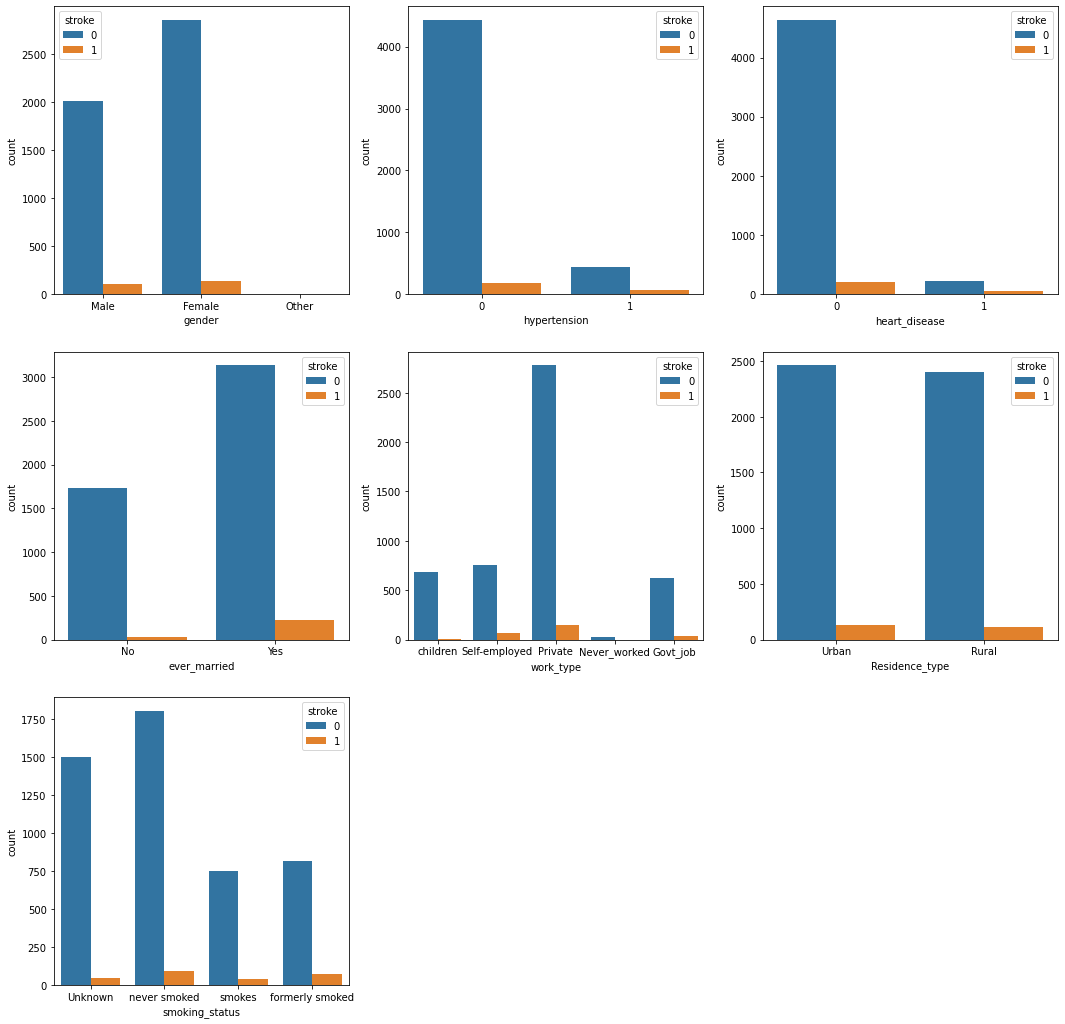

In [280]:
import matplotlib.pyplot as plt
import seaborn as sns
fig, axes = plt.subplots(nrows = 3, ncols = 3, figsize = (18, 18))
fig.delaxes( ax=axes[2,1])
fig.delaxes( ax=axes[2,2])


sns.countplot(x="gender", hue='stroke', palette='tab10', data=df , ax=axes[0,0])
sns.countplot(x="hypertension", hue='stroke', palette="tab10", data=df , ax=axes[0,1])
sns.countplot(x="heart_disease", hue='stroke', palette="tab10", data=df , ax=axes[0,2])
sns.countplot(x="ever_married", hue='stroke', palette="tab10", data=df , ax=axes[1,0])
sns.countplot(x="work_type", hue='stroke', palette="tab10", data=df , ax=axes[1,1])
sns.countplot(x="Residence_type", hue='stroke', palette="tab10", data=df , ax=axes[1,2])
sns.countplot(x="smoking_status", hue='stroke', palette="tab10", data=df , ax=axes[2,0])


plt.show()

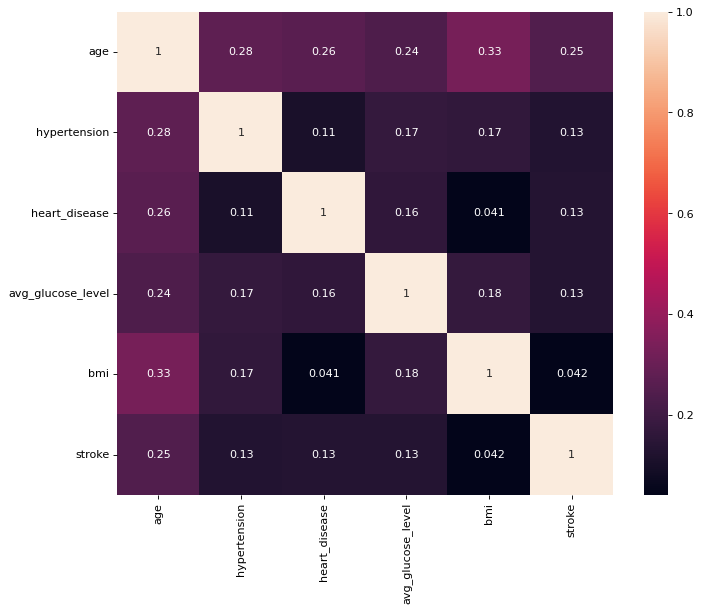

In [281]:
plt.figure(figsize=(10, 8), dpi=80)
sns.heatmap(data=df.corr(),cmap='rocket',cbar=True,robust=False,annot=True)

#Step 2: Search for null values in all columns and fill it with mean

In [282]:
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

hence BMI has 201 null values so let's handle it by filling it with mean

In [283]:
df['bmi'].describe()

count    4909.000000
mean       28.893237
std         7.854067
min        10.300000
25%        23.500000
50%        28.100000
75%        33.100000
max        97.600000
Name: bmi, dtype: float64

In [284]:
df['bmi'].fillna(df['bmi'].mean(), inplace=True)
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
2898,Male,0.24,0,0,No,children,Urban,58.35,18.6,Unknown,0
1353,Female,50.00,0,0,Yes,Self-employed,Rural,103.81,28.3,never smoked,0
2514,Male,18.00,0,0,No,Private,Urban,79.35,23.6,Unknown,0
3962,Female,80.00,0,0,Yes,Self-employed,Urban,223.26,25.4,never smoked,0
1462,Male,17.00,0,0,No,Never_worked,Rural,61.01,32.5,Unknown,0
...,...,...,...,...,...,...,...,...,...,...,...
4485,Female,49.00,0,0,Yes,Private,Urban,85.33,25.5,never smoked,0
4278,Female,62.00,0,0,Yes,Self-employed,Urban,86.40,32.6,smokes,0
168,Female,79.00,1,0,No,Govt_job,Urban,98.02,22.3,formerly smoked,1
2336,Female,78.00,1,0,Yes,Self-employed,Urban,191.33,24.5,never smoked,0


Now the BMI null values are filled with the mean 28.89

#Searching for duplicate records

In [285]:
df[df.duplicated()].value_counts

<bound method DataFrame.value_counts of Empty DataFrame
Columns: [gender, age, hypertension, heart_disease, ever_married, work_type, Residence_type, avg_glucose_level, bmi, smoking_status, stroke]
Index: []>

In [286]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5110 entries, 2898 to 1140
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                5110 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 608.1+ KB


#Step 3: Moving towards outliers

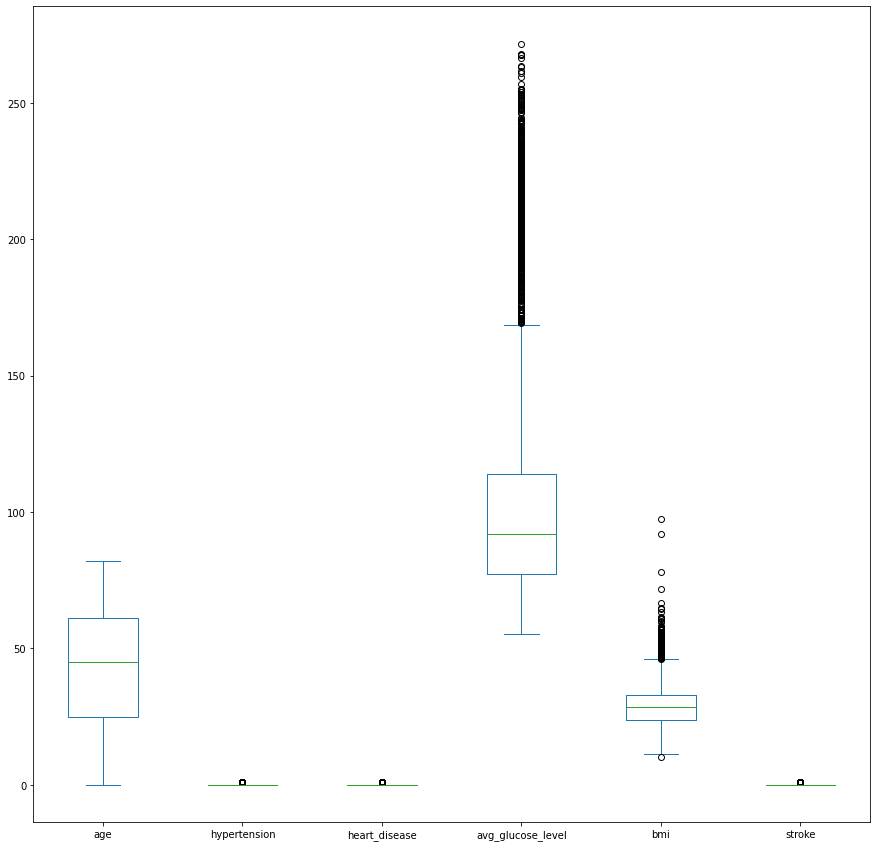

In [287]:
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize']=(15,15)
df.plot(kind="box")
plt.show()

#outliers found in average gulocose level, let's found the statistics

In [288]:
df['avg_glucose_level'].describe()

count    5110.000000
mean      106.147677
std        45.283560
min        55.120000
25%        77.245000
50%        91.885000
75%       114.090000
max       271.740000
Name: avg_glucose_level, dtype: float64

In [289]:
df['bmi'].describe()

count    5110.000000
mean       28.893237
std         7.698018
min        10.300000
25%        23.800000
50%        28.400000
75%        32.800000
max        97.600000
Name: bmi, dtype: float64

In [290]:
print(df[df['bmi']>70.00])
# Drop rows
df.drop(df.index[df['bmi'] > 70], inplace=True)
# Reset index of dataframe
df = df.reset_index(drop = True)

      gender   age  hypertension  heart_disease ever_married work_type  \
544     Male  42.0             0              0          Yes   Private   
2128    Male  17.0             1              0           No   Private   
928   Female  23.0             1              0           No   Private   
4209    Male  38.0             1              0          Yes   Private   

     Residence_type  avg_glucose_level   bmi smoking_status  stroke  
544           Rural             210.48  71.9   never smoked       0  
2128          Rural              61.67  97.6        Unknown       0  
928           Urban              70.03  78.0         smokes       0  
4209          Rural              56.90  92.0   never smoked       0  


#Label Encoding the data

In [291]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
gender = encoder.fit_transform(df["gender"])
ever_married= encoder.fit_transform(df["ever_married"])
work_type= encoder.fit_transform(df["work_type"])
Residence_type=encoder.fit_transform(df["Residence_type"])
smoking_status= encoder.fit_transform(df["smoking_status"])

In [292]:
df["gender"]=gender
df["ever_married"]=ever_married
df["work_type"]=work_type
df["Residence_type"]=Residence_type
df["smoking_status"]=smoking_status

In [293]:
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,0.24,0,0,0,4,1,58.35,18.6,0,0
1,0,50.00,0,0,1,3,0,103.81,28.3,2,0
2,1,18.00,0,0,0,2,1,79.35,23.6,0,0
3,0,80.00,0,0,1,3,1,223.26,25.4,2,0
4,1,17.00,0,0,0,1,0,61.01,32.5,0,0
...,...,...,...,...,...,...,...,...,...,...,...
5101,0,49.00,0,0,1,2,1,85.33,25.5,2,0
5102,0,62.00,0,0,1,3,1,86.40,32.6,3,0
5103,0,79.00,1,0,0,0,1,98.02,22.3,1,1
5104,0,78.00,1,0,1,3,1,191.33,24.5,2,0


In [294]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5106 entries, 0 to 5105
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5106 non-null   int64  
 1   age                5106 non-null   float64
 2   hypertension       5106 non-null   int64  
 3   heart_disease      5106 non-null   int64  
 4   ever_married       5106 non-null   int64  
 5   work_type          5106 non-null   int64  
 6   Residence_type     5106 non-null   int64  
 7   avg_glucose_level  5106 non-null   float64
 8   bmi                5106 non-null   float64
 9   smoking_status     5106 non-null   int64  
 10  stroke             5106 non-null   int64  
dtypes: float64(3), int64(8)
memory usage: 438.9 KB


# Spliting in train Test

In [295]:
X=df.drop('stroke', axis=1)
Y=df['stroke']

In [296]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test=train_test_split(X,Y,test_size=0.2,random_state=None)

#finding data imbalance

In [297]:
lis=df['stroke'].value_counts();
print((lis[0]+lis[1]),"Total Records")
print(lis[0], "Not Stroke")
print(lis[1],"Stroke")

5106 Total Records
4857 Not Stroke
249 Stroke


In [298]:
print(X_train)
print(Y_train)

      gender   age  hypertension  heart_disease  ever_married  work_type  \
1641       0  40.0             0              0             1          2   
5097       0  69.0             1              0             1          0   
1461       0  27.0             0              0             0          2   
2121       0  79.0             0              0             1          3   
908        1  54.0             0              0             1          2   
...      ...   ...           ...            ...           ...        ...   
2478       1  59.0             0              0             1          2   
1673       1  64.0             0              0             1          2   
2370       1  80.0             0              0             1          2   
2925       0  48.0             0              0             1          2   
1980       0  40.0             0              0             1          3   

      Residence_type  avg_glucose_level   bmi  smoking_status  
1641               0   

#upsample the data

In [299]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_train, Y_train = sm.fit_resample(X_train, Y_train)

In [300]:
print(X_train)
print(Y_train)

      gender        age  hypertension  heart_disease  ever_married  work_type  \
0          0  40.000000             0              0             1          2   
1          0  69.000000             1              0             1          0   
2          0  27.000000             0              0             0          2   
3          0  79.000000             0              0             1          3   
4          1  54.000000             0              0             1          2   
...      ...        ...           ...            ...           ...        ...   
7755       0  75.000000             0              0             0          2   
7756       0  68.464471             0              0             0          0   
7757       0  80.772068             0              0             1          2   
7758       0  52.492644             0              0             0          2   
7759       0  73.000000             1              0             1          2   

      Residence_type  avg_g

#Normalization

In [301]:
df.describe()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,5106.000000,5106.000000,5106.000000,5106.000000,5106.000000,5106.000000,5106.000000,5106.000000,5106.000000,5106.000000,5106.000000
mean,0.414023,43.236976,0.096945,0.054054,0.656287,2.167842,0.508226,106.152673,28.849381,1.376616,0.048766
std,0.492998,22.616627,0.295912,0.226146,0.474993,1.090710,0.499981,45.265408,7.534221,1.071468,0.215400
min,0.000000,0.080000,0.000000,0.000000,0.000000,0.000000,0.000000,55.120000,10.300000,0.000000,0.000000
25%,0.000000,25.000000,0.000000,0.000000,0.000000,2.000000,0.000000,77.282500,23.800000,0.000000,0.000000
50%,0.000000,45.000000,0.000000,0.000000,1.000000,2.000000,1.000000,91.890000,28.400000,2.000000,0.000000
75%,1.000000,61.000000,0.000000,0.000000,1.000000,3.000000,1.000000,114.090000,32.800000,2.000000,0.000000
max,2.000000,82.000000,1.000000,1.000000,1.000000,4.000000,1.000000,271.740000,66.800000,3.000000,1.000000


In [302]:
from sklearn.preprocessing import StandardScaler
std= StandardScaler()

In [303]:
X_train_std =std.fit_transform(X_train)
X_test_std =std.transform(X_test)

In [304]:
print("X_train :",X_train_std)
print("X_test :",X_test_std)

X_train : [[-0.67703245 -0.6798709  -0.31140783 ... -0.43965052  2.04211461
   0.75119487]
 [-0.67703245  0.62519313  3.21122303 ... -0.28984284  2.15177967
  -0.28585765]
 [-0.67703245 -1.2648996  -0.31140783 ... -0.14645549 -0.07285452
   0.75119487]
 ...
 [-0.67703245  1.1549622  -0.31140783 ...  1.66976911 -0.47402056
  -1.32291017]
 [-0.67703245 -0.11767432 -0.31140783 ... -0.86227644  0.54814157
  -0.28585765]
 [-0.67703245  0.80520197  3.21122303 ...  1.32855225  0.63417155
   0.75119487]]
X_test : [[-0.67703245 -1.57991506 -0.31140783 ...  0.49450736 -0.4331826
  -1.32291017]
 [-0.67703245  0.08516664 -0.31140783 ...  0.20880272  0.45980437
   0.75119487]
 [ 1.47527062 -2.07493935 -0.31140783 ... -0.96611751  0.64780162
  -1.32291017]
 ...
 [ 1.47527062  0.26517547 -0.31140783 ... -0.22046762 -0.46451547
  -0.28585765]
 [-0.67703245  0.35517989 -0.31140783 ... -1.14356827 -0.40184972
  -0.28585765]
 [-0.67703245 -0.31985323 -0.31140783 ... -0.78081968 -0.24518534
  -1.32291017]

#Modeling

In [305]:
from sklearn.tree import DecisionTreeClassifier # 1. Decision Tree Classifiers
from sklearn.linear_model import LogisticRegression #2. logistic Regression Classifiers
from sklearn.neighbors import KNeighborsClassifier # 3. KNN classifier
from sklearn.ensemble import RandomForestClassifier #4. Random Forest Classifier 
from sklearn.svm import SVC # 5. Support Vector Machine
from sklearn.naive_bayes import GaussianNB # Naive Bayes
from sklearn.metrics import confusion_matrix,accuracy_score # Confusion Matrix and accuracy score
from sklearn.metrics import classification_report # Classification report for further metrics


#1.Decision Tree classifier, confusion matrix and classification report

In [306]:
dt=DecisionTreeClassifier()
dt.fit(X_train_std, Y_train)
Y_pred=dt.predict(X_test_std)
prob_DT=dt.predict_proba(X_test_std)[:,1]
dt_acc=accuracy_score(Y_test,Y_pred)
dt_acc


0.8776908023483366

In [307]:
pd.crosstab(Y_test, Y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,885,92,977
1,33,12,45
All,918,104,1022


In [308]:
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.96      0.91      0.93       977
           1       0.12      0.27      0.16        45

    accuracy                           0.88      1022
   macro avg       0.54      0.59      0.55      1022
weighted avg       0.93      0.88      0.90      1022



#Logistic Regression classifier, , confusion matrix and classification report

In [309]:
LR = LogisticRegression()
LR.fit(X_train_std, Y_train)
Y_pred=LR.predict(X_test_std)
prob_LR = LR.predict_proba(X_test_std)[:,1]
lr_acc=accuracy_score(Y_test,Y_pred)
lr_acc

0.7808219178082192

In [310]:
pd.crosstab(Y_test, Y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,766,211,977
1,13,32,45
All,779,243,1022


In [311]:
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.98      0.78      0.87       977
           1       0.13      0.71      0.22        45

    accuracy                           0.78      1022
   macro avg       0.56      0.75      0.55      1022
weighted avg       0.95      0.78      0.84      1022



#KNN, confusion matrix and classification report

In [312]:
knn=KNeighborsClassifier()
knn.fit(X_train_std,Y_train)
Y_pred=knn.predict(X_test_std)
prob_KNN = knn.predict_proba(X_test_std)[:,1]

knn_acc=accuracy_score(Y_test,Y_pred)
knn_acc

0.7915851272015656

In [313]:
pd.crosstab(Y_test, Y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,791,186,977
1,27,18,45
All,818,204,1022


In [314]:
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.97      0.81      0.88       977
           1       0.09      0.40      0.14        45

    accuracy                           0.79      1022
   macro avg       0.53      0.60      0.51      1022
weighted avg       0.93      0.79      0.85      1022



# Random Forest, confusion matrix and classification report

In [315]:
rf=RandomForestClassifier()
rf.fit(X_train_std,Y_train)
Y_pred=rf.predict(X_test_std)
prob_RF = rf.predict_proba(X_test_std)[:,1]
rf_acc=accuracy_score(Y_test,Y_pred)
rf_acc

0.8962818003913894

In [316]:
pd.crosstab(Y_test, Y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,907,70,977
1,36,9,45
All,943,79,1022


In [317]:
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.96      0.93      0.94       977
           1       0.11      0.20      0.15        45

    accuracy                           0.90      1022
   macro avg       0.54      0.56      0.54      1022
weighted avg       0.92      0.90      0.91      1022



# Support Vector Machine (SVM), confusion matrix and classification report

In [318]:
sv = SVC(probability=True)
sv.fit(X_train_std,Y_train)
Y_pred=sv.predict(X_test_std)
prob_SVC = sv.predict_proba(X_test_std)[:,1]
svm_acc=accuracy_score(Y_test,Y_pred)
svm_acc

0.8111545988258317

In [319]:
pd.crosstab(Y_test, Y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,808,169,977
1,24,21,45
All,832,190,1022


In [320]:
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.97      0.83      0.89       977
           1       0.11      0.47      0.18        45

    accuracy                           0.81      1022
   macro avg       0.54      0.65      0.54      1022
weighted avg       0.93      0.81      0.86      1022



# Naive Bayes, confusion matrix and classification report

In [321]:
NB = GaussianNB()
NB.fit(X_train_std, Y_train)
Y_pred=NB.predict(X_test_std)
prob_NB = NB.predict_proba(X_test_std)[:,1]
NB_acc=accuracy_score(Y_test, Y_pred)
NB_acc

0.7191780821917808

In [322]:
pd.crosstab(Y_test, Y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,706,271,977
1,16,29,45
All,722,300,1022


In [323]:
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.98      0.72      0.83       977
           1       0.10      0.64      0.17        45

    accuracy                           0.72      1022
   macro avg       0.54      0.68      0.50      1022
weighted avg       0.94      0.72      0.80      1022



In [324]:
print(dt_acc)
print(lr_acc)
print(knn_acc)
print(rf_acc)
print(svm_acc)
print(NB_acc)

0.8776908023483366
0.7808219178082192
0.7915851272015656
0.8962818003913894
0.8111545988258317
0.7191780821917808


<BarContainer object of 6 artists>

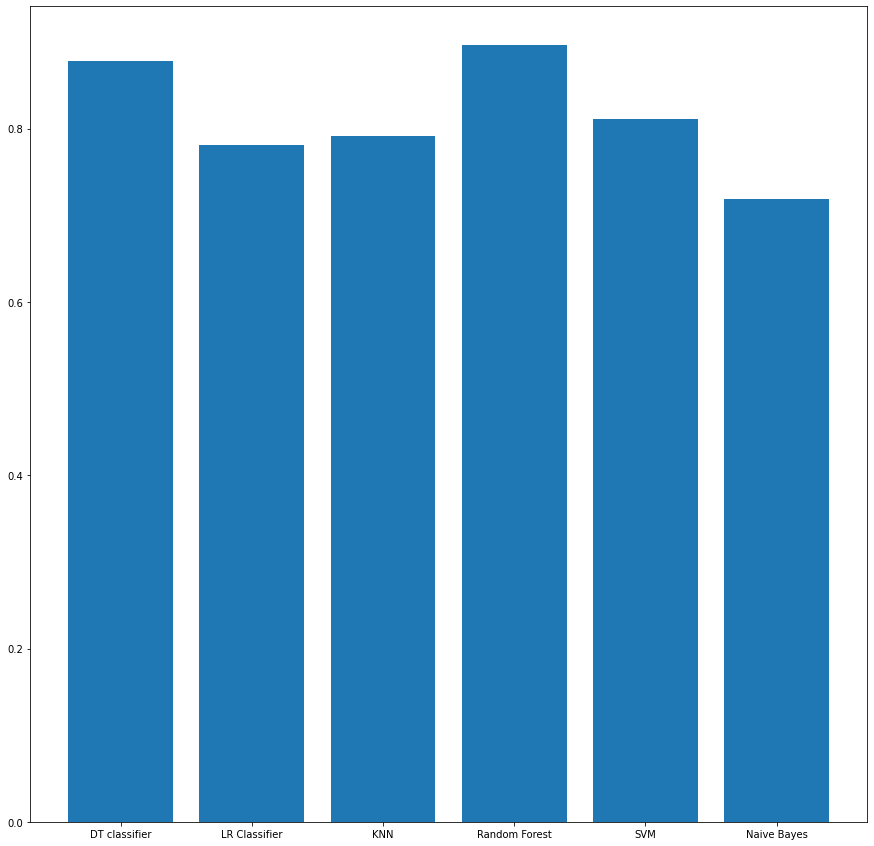

In [325]:
plt.bar(['DT classifier','LR Classifier','KNN', 'Random Forest', 'SVM', 'Naive Bayes'],[dt_acc,lr_acc,knn_acc, rf_acc, svm_acc, NB_acc])

# AUC ROC Curve

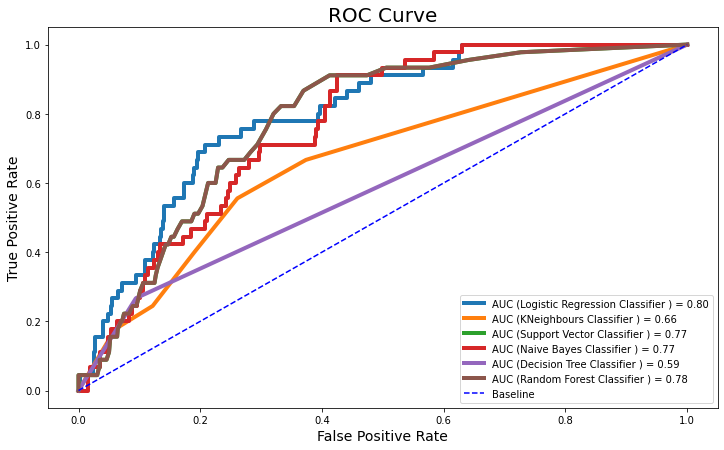

In [326]:
#  Visualize the ROC curves and calculate the AUC
from sklearn.metrics import roc_curve, auc, roc_auc_score
y_test = pd.Series(Y_test).replace({'Good':1, 'Bed':0})

roc_score_LR = roc_auc_score(y_test, prob_LR)
fpr_LR, tpr_LR, threshold_LR = roc_curve(y_test, prob_LR)
auc_LR = auc(fpr_LR, tpr_LR)

roc_score_KNC = roc_auc_score(y_test, prob_KNN)
fpr_KNC, tpr_KNC, threshold_KNC = roc_curve(y_test, prob_KNN)
auc_KNC = auc(fpr_KNC, tpr_KNC)

roc_score_SVC = roc_auc_score(y_test, prob_SVC)
fpr_SVC, tpr_SVC, threshold_SVC = roc_curve(y_test, prob_RF)
auc_RF = auc(fpr_SVC, tpr_SVC)


roc_score_NB = roc_auc_score(y_test, prob_NB)
fpr_NB, tpr_NB, threshold_NB = roc_curve(y_test, prob_NB)
auc_NB = auc(fpr_NB, tpr_NB)

roc_score_DT = roc_auc_score(y_test, prob_DT)
fpr_DT, tpr_DT, threshold_DT = roc_curve(y_test, prob_DT)
auc_DT = auc(fpr_DT, tpr_DT)

roc_score_RF = roc_auc_score(y_test, prob_RF)
fpr_RF, tpr_RF, threshold_RF = roc_curve(y_test, prob_RF)
auc_RF = auc(fpr_RF, tpr_RF)


plt.figure(figsize=(12,7))
plt.plot(fpr_LR, tpr_LR, label = f'AUC (Logistic Regression Classifier ) = {roc_score_LR:.2f}', linewidth = 4)
plt.plot(fpr_KNC, tpr_KNC, label = f'AUC (KNeighbours Classifier ) = {roc_score_KNC:.2f}', linewidth = 4)
plt.plot(fpr_SVC, tpr_SVC, label = f'AUC (Support Vector Classifier ) = {roc_score_SVC:.2f}', linewidth = 4)
plt.plot(fpr_NB, tpr_NB, label = f'AUC (Naive Bayes Classifier ) = {roc_score_NB:.2f}', linewidth = 4)
plt.plot(fpr_DT, tpr_DT, label = f'AUC (Decision Tree Classifier ) = {roc_score_DT:.2f}', linewidth = 4)
plt.plot(fpr_RF, tpr_RF, label = f'AUC (Random Forest Classifier ) = {roc_score_RF:.2f}', linewidth = 4)

plt.plot([0, 1], [0, 1], color='blue', linestyle='--', label='Baseline')
plt.title('ROC Curve', size=20)
plt.xlabel('False Positive Rate', size=14)
plt.ylabel('True Positive Rate', size=14)
plt.legend();